<a href="https://colab.research.google.com/github/NgoThanhNha/Artificial_Intelligence/blob/main/W9_31_03_2023_ANN_Detect_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
# keras: dat bien theo keras (ko dc tuy y)
from keras.datasets import mnist
(train_images, train_labels),(test_image, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X = test_image
y = test_labels

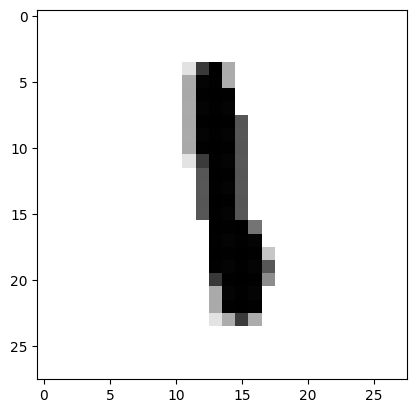

So nay la:  1


In [ ]:
digit = train_images[200]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print('So nay la: ', train_labels[200])

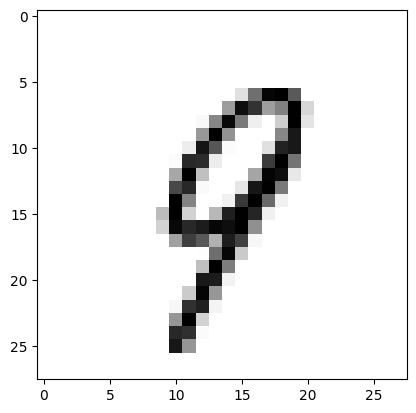

Số này là:  9


In [ ]:
digit = train_images[22]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print('Số này là: ', train_labels[22])

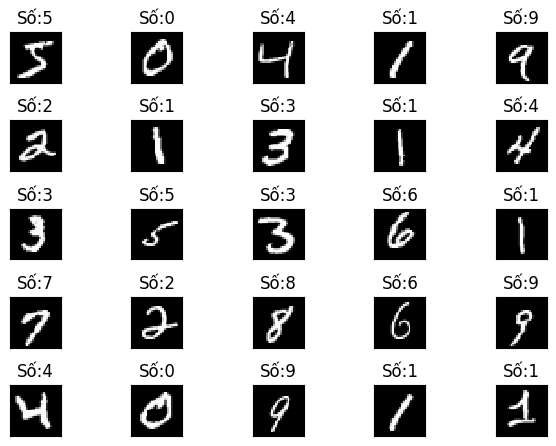

In [ ]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation = 'none')
  plt.title('Số:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(512,activation = 'relu',input_shape = (784,))) # Lớp đầu tiên

In [ ]:
# Lớp thứ 2
model.add(Dense(10,activation = 'Softmax')) # Liên kết với lớp trước đó, có 10 output ở ngõ ra

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_images = train_images.reshape(60000,28*28)
train_image = train_images.astype('float32')/255

In [ ]:
train_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_images = test_image.reshape(10000,28*28)
test_images = test_images.astype('float32')/255

In [ ]:
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0373 - accuracy: 0.9978
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0626 - accuracy: 0.9969
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0484 - accuracy: 0.9971
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0562 - accuracy: 0.9971
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0446 - accuracy: 0.9976
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0552 - accuracy: 0.9970
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0556 - accuracy: 0.9971
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0552 - accuracy: 0.9975
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0525 - accuracy: 0.9975
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0328 - accura

In [ ]:
test_loss, test_acc = model.evaluate(test_image,test_labels)
print('Mất mát:',test_loss)
print('Độ chính xác',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.1651 - accuracy: 0.9493
Mất mát: 1.165116548538208
Độ chính xác 0.9492999911308289


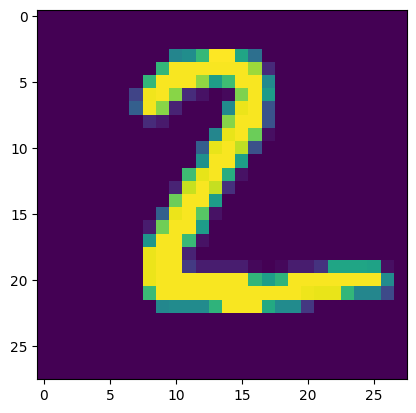

2


In [ ]:
img = X[1]
plt.imshow(img)
plt.show()
print(y[1])

In [ ]:
import numpy as np

X_pred = X[1].reshape(1,28*28)
X_pred = X_pred.astype('float32')/255
np.argmax(model.predict(X_pred),axis = -1)

1/1 [==============================] - 0s 21ms/step


array([2])

In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

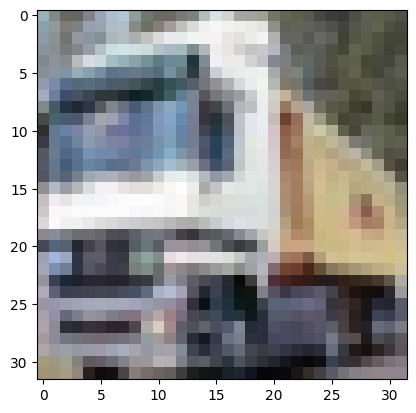

In [ ]:
# Hiển thị ảnh đầu tiên trong tập huấn luyện
plt.imshow(x_train[1])
plt.show()

In [ ]:
X = x_test
y = y_test

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Chuẩn hóa dữ liệu
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255